In [29]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

images_list_b = []
SIZE = 128

path = "/home/abbas/pict/ben/*.*"

for file in glob.glob(path):
    print(file)   
    img= cv2.imread(file,1) 
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_b.append(img)
        
images_list_b = np.array(images_list_b)

 

/home/abbas/pict/ben/15.jpeg
/home/abbas/pict/ben/8.jpeg
/home/abbas/pict/ben/13.jpeg
/home/abbas/pict/ben/19.jpeg
/home/abbas/pict/ben/18.jpeg
/home/abbas/pict/ben/14.jpeg
/home/abbas/pict/ben/12.jpeg
/home/abbas/pict/ben/4.jpeg
/home/abbas/pict/ben/10.jpeg
/home/abbas/pict/ben/20.jpeg
/home/abbas/pict/ben/16.jpeg
/home/abbas/pict/ben/5.jpeg
/home/abbas/pict/ben/11.jpeg
/home/abbas/pict/ben/2.jpeg
/home/abbas/pict/ben/9.jpeg
/home/abbas/pict/ben/6.jpeg
/home/abbas/pict/ben/1.jpeg
/home/abbas/pict/ben/17.jpeg
/home/abbas/pict/ben/7.jpeg
/home/abbas/pict/ben/3.jpeg


In [2]:
images_list_m = []
SIZE = 128

path = "/home/abbas/pict/monica/*.*"

for file in glob.glob(path):
    print(file)    
    img= cv2.imread(file,1)  
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_m.append(img)
        
images_list_m = np.array(images_list_m)



/home/abbas/pict/monica/013.jpeg
/home/abbas/pict/monica/005.jpeg
/home/abbas/pict/monica/018.jpeg
/home/abbas/pict/monica/007.jpeg
/home/abbas/pict/monica/012.jpeg
/home/abbas/pict/monica/009.jpeg
/home/abbas/pict/monica/010.jpeg
/home/abbas/pict/monica/001.jpeg
/home/abbas/pict/monica/015.jpeg
/home/abbas/pict/monica/004.jpeg
/home/abbas/pict/monica/008.jpeg
/home/abbas/pict/monica/002.jpeg
/home/abbas/pict/monica/020.jpeg
/home/abbas/pict/monica/006.jpeg
/home/abbas/pict/monica/003.jpeg
/home/abbas/pict/monica/016.jpeg
/home/abbas/pict/monica/019.jpeg
/home/abbas/pict/monica/017.jpeg
/home/abbas/pict/monica/014.jpeg
/home/abbas/pict/monica/011.jpeg


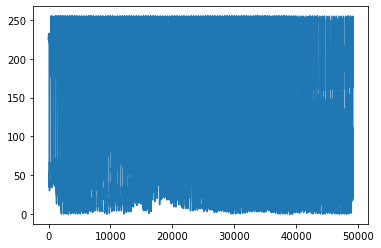

In [3]:
plt.plot(images_list_m[4])

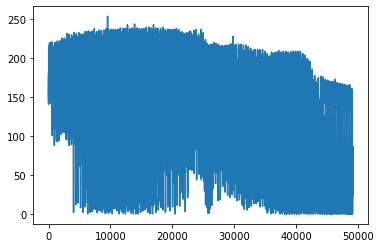

In [4]:
plt.plot(images_list_b[7])

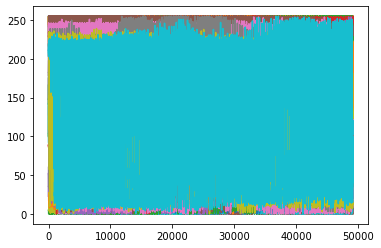

In [5]:
for i in images_list_b:
    print(plt.plot(i))

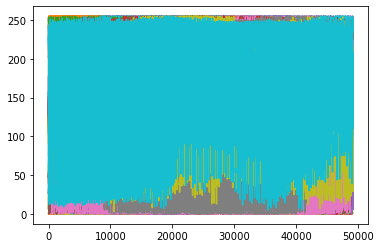

In [6]:
for i in images_list_m:
    print(plt.plot(i))

In [7]:
y1=np.zeros(20)
y2=np.ones(20)

In [8]:
y=np.concatenate((y1,y2),axis=0)

In [9]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [10]:
y.shape

(40,)

In [11]:
x1=images_list_b
x2=images_list_m

In [12]:
x=np.concatenate((x1,x2),axis=0)
x.shape

(40, 49152)

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 10,shuffle=True)

# 1. SVM

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly',degree=2,C=1,gamma='scale')

In [16]:
svm.fit(x_train,y_train)

SVC(C=1, degree=2, kernel='poly')

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
SVM_Score=accuracy_score(y_test,svm.predict(x_test))
SVM_Score

0.75

# 2. KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
KNN_Score=KNN.score(x_test,y_test)
KNN_Score

0.5

# 3. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)

LogisticRegression()

In [47]:
Logistic_Regression_Score=Logistic_Regression.score(x_test,y_test)
Logistic_Regression_Score

0.625

# 4. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier()
DTree.fit(x_train , y_train)

DecisionTreeClassifier()

In [25]:
DTree_Score=DTree.score(x_test,y_test)


# 5. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest=RandomForestClassifier()
Random_Forest.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
Random_Forest_Score=Random_Forest.score(x_test,y_test)


In [30]:
results=pd.DataFrame({
    "SVM": (SVM_Score*100),
    "Random Forest": (Random_Forest_Score*100),
    "KNN": (KNN_Score*100),
    "Decision Tree": (DTree_Score*100),
    "Logistic Regression": (Logistic_Regression_Score*100)
    
},index=['Score'])

In [31]:
results

,SVM,Random Forest,KNN,Decision Tree,Logistic Regression
Score,75.0,50.0,50.0,50.0,62.5


<AxesSubplot:>

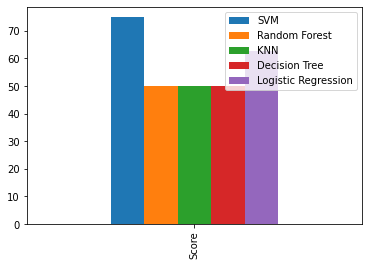

In [32]:
results.plot(kind='bar')